In [ ]:
import matplotlib.pyplot as plt

from skimage.draw import random_shapes

# Let's start simple and generate a 128x128 image
# with a single grayscale rectangle.
result = random_shapes((128, 128), max_shapes=30, shape='rectangle',
                       channel_axis=None, num_channels = 3)

# We get back a tuple consisting of (1) the image with the generated shapes
# and (2) a list of label tuples with the kind of shape (e.g. circle,
# rectangle) and ((r0, r1), (c0, c1)) coordinates.
image, labels = result
print(f'Image shape: {image.shape}\nLabels: {labels}')

# We can visualize the images.
fig, axes = plt.subplots(nrows=2, ncols=3)
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Grayscale shape')

# The generated images can be much more complex. For example, let's try many
# shapes of any color. If we want the colors to be particularly light, we can
# set the `intensity_range` to an upper subrange of (0,255).
image1, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((100, 255),))

# Moar :)
image2, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((200, 255),))
image3, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((50, 255),))
image4, _ = random_shapes((128, 128), max_shapes=10,
                          intensity_range=((0, 255),))

for i, image in enumerate([image1, image2, image3, image4], 1):
    ax[i].imshow(image)
    ax[i].set_title(f'Colored shapes, #{i-1}')

# These shapes are well suited to test segmentation algorithms. Often, we
# want shapes to overlap to test the algorithm. This is also possible:
image, _ = random_shapes((128, 128), min_shapes=5, max_shapes=10,
                         min_size=20, allow_overlap=True)
ax[5].imshow(image)
ax[5].set_title('Overlapping shapes')

for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.show()

In [2]:
def img_transparent(img):
    datas = img.getdata()
    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img = img.putdata(newData)
    return img

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
img_folder = '/content/drive/MyDrive/Colab Notebooks/'

MessageError: ignored

In [ ]:

from PIL import Image, ImageTk
import os
import matplotlib.pyplot as plt
from skimage.draw import random_shapes
from google.colab import drive
from numpy.random import randint
drive.mount('/content/drive', force_remount = True)
img_folder = '/content/drive/MyDrive/traffic_signs/images/Test'
for file in os.listdir(img_folder):
  img3 = Image.open(os.path.join(img_folder,file))
  img3 = img3.convert('RGBA')
  pixels = img3.getpixel((2,round(img3.size[0]/2)))[:-1]
  if pixels == (255,255,255):
    pixels =(248,255,255)
  max_shapes = round((img3.size[1]*img3.size[0])/8)
  max_shapes = round((img3.size[1]*img3.size[0])/16)
  max_size = round((img3.size[1]/3))
  min_size = round((img3.size[1]/5))
  image1, _ = random_shapes(img3.size,min_shapes = 6, max_shapes = 10, max_size=max_size
                            , min_size = min_size,
                            intensity_range=((min(pixels), max(pixels)),),allow_overlap=True)
    # Opening the primary image (used in background)
  img1 = Image.fromarray(obj = image1)
  img1 = img1.rotate(randint(0,360))
  img_new = img1.convert('RGBA')
  for width in range(img_new.size[0]):
    for height in range(img_new.size[1]):
      if img_new.getpixel((width,height)) == (255,255,255,255) or img_new.getpixel((width,height)) == (0,0,0,255):
        img_new.putpixel((width,height), (0,0,0,0))
        #print(img_new.getpixel((width,height))[-1])

  #img1 = img1.getchannel('A').convert(colors = (255,255,255,0))
  # Pasting img2 image on top of img1
  # starting at coordinates (0, 0)

  img3.paste(img_new, (0,0), mask = img_new)
  # Displaying the imagei
  img3.save(f'/content/drive/MyDrive/traffic_signs/images/Train/0/{file}')



In [1]:
pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import colorama
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import Model, models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
#from traffic_signs_code import params
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from colorama import Fore, Style
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os, cv2, glob
from google.colab import drive


In [5]:
drive.mount('/content/drive', force_remount = True)
img_folder = '/content/drive/MyDrive/traffic_signs/images/Train'

Mounted at /content/drive


In [23]:
print(len(os.listdir(os.path.join((img_folder),'0'))), len(os.listdir(os.path.join((img_folder),'1'))))

2079 2023


In [21]:
def create_dataset(img_folder):

    img_data_array=[]
    class_name=[]
    IMG_WIDTH=100
    IMG_HEIGHT=100
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):

            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name

In [8]:
img_data, class_name= create_dataset(img_folder)

In [9]:
from sklearn.utils import shuffle
import numpy as np

X = img_data
y = class_name
X, y = shuffle(X, y)
#print(X)
#print(y)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, shuffle=True)
X_train_tf = tf.convert_to_tensor(X_train)
y_train_array = np.array(y_train).astype(int)
X_test_tf = tf.convert_to_tensor(X_test)
y_test_array = np.array(y_test).astype(int)

In [10]:
def initialize_base_model():

    model = models.Sequential()

    ### First Convolution & MaxPooling
    # YOUR CODE HERE
    model.add(layers.Conv2D(8, (3,3), activation='relu', padding='same', input_shape=(100, 100, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Third Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Fourth Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Fifth Convolution & MaxPooling
    model.add(layers.Conv2D(64, (3,3), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    ### Flattening
    # YOUR CODE HERE
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    # YOUR CODE HERE
    model.add(layers.Dense(10, activation='relu'))


    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    # YOUR CODE HERE
    model.add(layers.Dense(1, activation='sigmoid'))

    ### Model compilation
    # YOUR CODE HERE
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [11]:
def model_from_Federico(model):
  augmentation = Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.2, 0.2),
        layers.RandomRotation(0.1)
    ])
  augment_model = Sequential([
        layers.Input(shape = (100,100,3)),
        augmentation,
        model])
  return augment_model


In [12]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)


Processing using Base Model...

Training model...
Epoch 1/100
32/32 [==============================] - 13s 42ms/step - loss: 0.6924 - accuracy: 0.5027 - val_loss: 0.6858 - val_accuracy: 0.5186
Epoch 2/100
32/32 [==============================] - 1s 16ms/step - loss: 0.6601 - accuracy: 0.5485 - val_loss: 0.6071 - val_accuracy: 0.6357
Epoch 3/100
32/32 [==============================] - 0s 15ms/step - loss: 0.5718 - accuracy: 0.7382 - val_loss: 0.5152 - val_accuracy: 0.7691
Epoch 4/100
32/32 [==============================] - 1s 16ms/step - loss: 0.4763 - accuracy: 0.8019 - val_loss: 0.4451 - val_accuracy: 0.8063
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 0.4082 - accuracy: 0.8263 - val_loss: 0.3043 - val_accuracy: 0.9118
Epoch 6/100
32/32 [==============================] - 0s 14ms/step - loss: 0.3377 - accuracy: 0.8751 - val_loss: 0.2798 - val_accuracy: 0.8956
Epoch 7/100
32/32 [==============================] - 0s 15ms/step - loss: 0.3311 - accuracy: 0.8

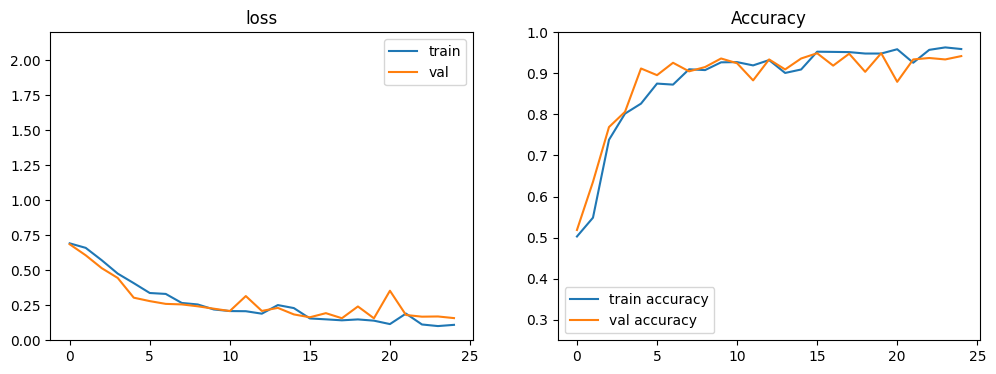

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
#es = EarlyStopping(patience=4 ,restore_best_weights=True)
#es = EarlyStopping()
#model = initialize_model()
# Fit the model on the train data
#history = model.fit(X_train_tf, y_train_array, validation_split=0.3, epochs=25, batch_size=8, callbacks=[es], verbose=1)


def train_base_model(model: Model, X: np.ndarray, y: np.ndarray, batch_size=8, patience=4,
                     validation_data=None, validation_split=0.3):


    """
    Fit the model and return a tuple (fitted_model, history)
    """
    print(Fore.BLUE + "\nTraining model..." + Style.RESET_ALL)

    es = EarlyStopping(
        monitor="val_loss",
        patience=patience,
        restore_best_weights=True,
        verbose=1
    )

    es = EarlyStopping(patience=5 ,restore_best_weights=True)
    model = initialize_base_model()
    #model = model_from_Federico(model)
    # Fit the model on the train data
    history = model.fit(X, y, validation_split=0.3, epochs=100, batch_size=64, callbacks=[es], verbose=1)

    print(f"✅ Model trained with min val ACCURACY: {round(np.min(history.history['val_accuracy']), 2)}")

    return model, history


def evaluate_base_model(model: Model, X: np.ndarray, y: np.ndarray, batch_size=16):

    """
    Evaluate trained model performance on the dataset
    """
    print(Fore.BLUE + f"\nEvaluating model on {len(X)} rows..." + Style.RESET_ALL)
    if model is None:
        print(f"\n❌ No model to evaluate")
        return None

    metrics = model.evaluate(x=X, y=y, batch_size=32, verbose=0, return_dict=True)
    loss = metrics["loss"]
    accuracy = metrics["accuracy"]

    print(f"✅ Model evaluated, Accuracy: {round(accuracy, 2)}")
    return metrics

print(Fore.GREEN + f"\nProcessing using Base Model..." + Style.RESET_ALL)
model1 = initialize_base_model()
model2 = model_from_Federico(model1)
#model1, history1 = train_base_model(model1, X_train_preproc, y_train)
model2, history1 = train_base_model(model1, X_train_tf, y_train_array)
plot_history(history1)
base_model_score = evaluate_base_model(model2, X_test_tf, y_test_array)

y_pred= model2.predict(X_test_tf).round()
y_pred= y_pred.astype(int)
target_names=['class_0', 'class_1']
print(classification_report(y_test_array, y_pred, target_names=target_names))

In [14]:
results_df = pd.DataFrame({"actual": y_test,
                           "predicted": y_pred[:,0]}) #Store results in a dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])
confusion_matrix

predicted,0,1
actual,,
0,558,49
1,30,594


In [ ]:
drive.mount('/content/drive', force_remount = True)
model_folder = '/content/drive/MyDrive/traffic_signs/models/model_20230615_test_v10.h5'
model2.save(model_folder)

In [25]:
test_img = '/content/drive/MyDrive/traffic_signs/images/Test_Prediction_Mix/croped/'
model_folder = '/content/drive/MyDrive/traffic_signs/models/improved_model.h5'
img_test = os.listdir(test_img)

In [26]:
from google.colab.patches import cv2_imshow

In [27]:
os.listdir(test_img)

['example10.png',
 'download.png',
 'example7.png',
 'example8.jpeg',
 'example110.png',
 'example11.png',
 'example12.png',
 'clean.jpg',
 '00015.jpg',
 'example12 (1).jpg',
 'example12.jpg',
 '___0.jpg',
 'aasdf.jpg',
 'aasdfpng.png',
 'BeFunky-photo.png',
 '000001.png',
 '000002.png',
 '000003.png',
 'images (1).jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg']

In [30]:
for file in os.listdir(test_img):
  crop_img= cv2.imread(os.path.join(test_img,file), cv2.IMREAD_COLOR) #3,9
  cv2_imshow(crop_img)
  crop_img= cv2.resize(crop_img, (224,224), interpolation = cv2.INTER_AREA).astype('float')
  #crop_img = np.array(crop_img)/255.
  crop_img= np.expand_dims(crop_img, axis=0)
  model_new= tf.keras.models.load_model(model_folder, compile=False)
  model_new.compile(loss='binary_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])
  pred= model_new.predict(crop_img)
  print(crop_img.shape)
  print(pred)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
model_new= tf.keras.models.load_model(model_folder, compile=False)
model_new.compile(loss='binary_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])
pred= model_new.predict(crop_img)


In [ ]:
pred